# Question 1


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
import skimage
from skimage.feature import blob_log


Range of sigma values used: 2 - 40
The maximum initial radius (before adjustment): 36.0
The maximum adjusted radius: 50.91168824543143


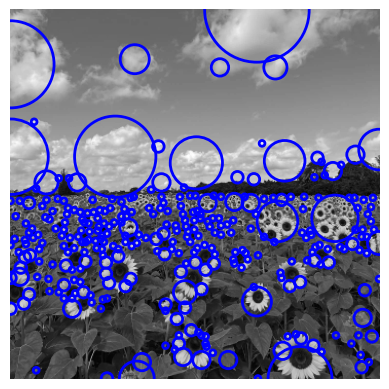

In [32]:
# Load the original image with reduced color resolution
image_original = cv.imread("Images/New folder/the_berry_farms_sunflower_field.jpeg", cv.IMREAD_REDUCED_COLOR_4)

# Convert the image to grayscale
image_gray = cv.cvtColor(image_original, cv.COLOR_BGR2GRAY)

# Detect blobs using the Laplacian of Gaussian (LoG) method
blobs_log = blob_log(image_gray, min_sigma=2, max_sigma=40, num_sigma=20, threshold=0.1)

# Find the maximum radius of the detected blobs before adjustment
max_initial_radius = max(blobs_log[:, 2])

# Adjust the detected blobs' sizes by multiplying the radius by sqrt(2)
# This step adjusts the radii to more accurately reflect blob size
blobs_log[:, 2] = blobs_log[:, 2] * math.sqrt(2)

# Find the maximum radius after adjustment
max_adjusted_radius = max(blobs_log[:, 2])

# Create a figure and axis to display the grayscale image
fig, ax = plt.subplots()
ax.imshow(image_gray, cmap='gray')  # Display the grayscale image
ax.axis('off')  # Hide axis for better visualization

# Loop through each detected blob and draw a circle around it
for blob in blobs_log:
    y, x, radius = blob  # Extract blob coordinates and radius
    # Create a circular patch around each blob
    circle = plt.Circle((x, y), radius, color='blue', linewidth=2, fill=False)
    ax.add_patch(circle)  # Add the circle to the plot

# Print information about sigma range and maximum blob radius
print('Range of sigma values used: 2 - 40')
print(f'The maximum initial radius (before adjustment): {max_initial_radius}')
print(f'The maximum adjusted radius: {max_adjusted_radius}')

# Show the plot with detected blobs
plt.show()

# Question 2

In [39]:
# Generation of a Noisy Point Set Conforming to a Line and a Circle
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
import tikzplotlib

# np.random.seed (0)
N = 100
half_n = N//2

r = 10
x0_gt, y0_gt = 2, 3     # Center
s = r/16

t = np.random.uniform (0, 2*np.pi ,half_n)
n = s * np.random.randn(half_n)
x, y = x0_gt + (r+n)*np.cos(t), y0_gt + (r+n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1 ), y.reshape(half_n, 1)))

s = 1.
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n ,1), y.reshape(half_n, 1)))
X = np.vstack((X_circ, X_line))     # All points

fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(X_line[:, 0], X_line [:, 1], label= 'Line')
ax.scatter(X_circ[:, 0], X_circ[:, 1], label= 'Circle')

circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground truth circle')
ax.add_patch(circle_gt)
ax.plot((x0_gt), (y0_gt), '+', color='g')
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = m*x_ + b
plt.plot(x_, y_, color='m', label='Ground truth line')
plt.legend()




ImportError: cannot import name 'common_texification' from 'matplotlib.backends.backend_pgf' (c:\Python312\Lib\site-packages\matplotlib\backends\backend_pgf.py)

In [38]:
import matplotlib
print(matplotlib.__version__)


3.9.1



Iteration:  5
Best line error:  6.289160844169659
Best sample indices for line:  [66 75]
Best line model:  [0.69866105 0.71545282 1.39220881]
Total inliers:  46

Iteration:  50
Best line error:  5.963199394288944
Best sample indices for line:  [74 94]
Best line model:  [0.70223267 0.71194753 1.33721756]
Total inliers:  47

Iteration:  93
Best line error:  5.333647994677004
Best sample indices for line:  [89 76]
Best line model:  [0.70558041 0.70862988 1.27701525]
Total inliers:  46

----------------------------------- Circle Estimation -----------------------------------
Number of inliers for line model:  46
Number of points remaining for circle estimation:  54

Iteration:  100
Best circle error:  10.217587550483852
Best circle sample indices:  [28  8 13]
Best circle model:  [1.90705551 3.2646703  9.84422575]
Total inliers:  44

Iteration:  100
Best circle error:  5.333761667245364
Best circle sample indices:  [21 36 13]
Best circle model:  [2.06827226 3.44867829 9.6759135 ]
Total inl

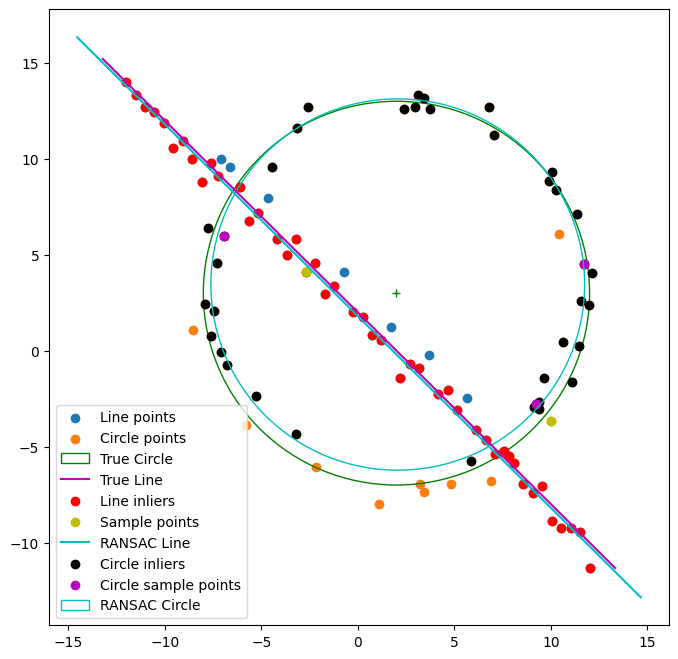

In [26]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Set up the parameters
total_points = 100
half_points = total_points // 2

circle_radius = 10
center_x, center_y = 2, 3  # Circle center
noise_scale = circle_radius / 16

# Generate noisy points on the circle
angle = np.random.uniform(0, 2 * np.pi, half_points)
noise = noise_scale * np.random.randn(half_points)
x_circle = center_x + (circle_radius + noise) * np.cos(angle)
y_circle = center_y + (circle_radius + noise) * np.sin(angle)
circle_points = np.hstack((x_circle.reshape(half_points, 1), y_circle.reshape(half_points, 1)))

# Generate noisy points on the line
line_slope, line_intercept = -1, 2
x_line = np.linspace(-12, 12, half_points)
y_line = line_slope * x_line + line_intercept + noise_scale * np.random.randn(half_points)
line_points = np.hstack((x_line.reshape(half_points, 1), y_line.reshape(half_points, 1)))

# Combine circle and line points
all_points = np.vstack((circle_points, line_points))

# Plot the points and ground truth models
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(line_points[:, 0], line_points[:, 1], label='Line points')
ax.scatter(circle_points[:, 0], circle_points[:, 1], label='Circle points')

# Plot ground truth circle and line
true_circle = plt.Circle((center_x, center_y), circle_radius, color='g', fill=False, label='True Circle')
ax.add_patch(true_circle)
ax.plot(center_x, center_y, '+', color='g')
x_min, x_max = ax.get_xlim()
x_vals = np.array([x_min, x_max])
y_vals = line_slope * x_vals + line_intercept
ax.plot(x_vals, y_vals, color='m', label='True Line')
ax.legend()

# Line estimation using RANSAC
def line_constraint(params):
    # Constraint for the line: equation of the line
    return (params[0] ** 2) + (params[1] ** 2) - 1

line_cons = ({'type': 'eq', 'fun': line_constraint})

def line_lse_error(params, indices):
    # Compute total least square error for a line
    a, b, c = params[0], params[1], params[2]
    error = np.square(a * all_points[indices, 0] + b * all_points[indices, 1] - c)
    return np.sum(error)

def line_consensus_set(all_points, params, threshold):
    # Find consensus set for the line
    a, b, c = params[0], params[1], params[2]
    error = np.abs(a * all_points[:, 0] + b * all_points[:, 1] - c)
    return error < threshold

# RANSAC parameters for line estimation
max_iter = 100
line_inliers_needed = 0.4 * total_points
line_threshold = 1.0
best_line_error = np.inf
line_sample_size = 2
iteration_count = 0

best_line_model = []
best_line_inliers = []
best_line_sample_indices = []

while iteration_count < max_iter:
    # Randomly sample points for line estimation
    line_sample_indices = np.random.randint(0, total_points, line_sample_size)

    # Initial guess for the model
    initial_guess = np.array([1, 1, 0])
    # Minimize the least squares error
    result = minimize(line_lse_error, initial_guess, args=(line_sample_indices), tol=1e-6, constraints=line_cons)
    # Get consensus set
    line_inliers = line_consensus_set(all_points, result.x, line_threshold)

    if np.sum(line_inliers) > line_inliers_needed:
        initial_guess = result.x
        # Refit the model using the consensus inliers
        result = minimize(line_lse_error, initial_guess, args=(line_inliers), tol=1e-6, constraints=line_cons)

        if result.fun < best_line_error:
            print('\nIteration: ', iteration_count)
            best_line_error = result.fun
            best_line_sample_indices = line_sample_indices
            best_line_model = result.x
            best_line_inliers = line_inliers

            print('Best line error: ', result.fun)
            print('Best sample indices for line: ', line_sample_indices)
            print('Best line model: ', result.x)
            print('Total inliers: ', np.sum(line_inliers))

    iteration_count += 1

# Plot the RANSAC results for the line
ax.scatter(all_points[best_line_inliers, 0], all_points[best_line_inliers, 1], color='r', label='Line inliers')
ax.scatter(all_points[line_sample_indices, 0], all_points[line_sample_indices, 1], color='y', label='Sample points')
x_min, x_max = ax.get_xlim()
x_vals = np.array([x_min, x_max])
y_vals = (-best_line_model[1] * x_vals + best_line_model[2]) / best_line_model[1]
ax.plot(x_vals, y_vals, color='c', label='RANSAC Line')
ax.legend()

# Circle estimation using RANSAC
print('\n----------------------------------- Circle Estimation -----------------------------------')
print('Number of inliers for line model: ', np.sum(best_line_inliers))

# Find outliers from the line model to estimate the circle
line_outliers = np.where(best_line_inliers == False)[0]
remnant_points = np.array([all_points[line_outliers[i]] for i in range(len(line_outliers))])
print('Number of points remaining for circle estimation: ', len(remnant_points))

def circle_lse_error(params, indices):
    # Total least square error for a circle
    center_x, center_y, radius = params
    x_points, y_points = remnant_points[indices].T
    error = (np.sqrt((x_points - center_x) ** 2 + (y_points - center_y) ** 2) - radius) ** 2
    return np.sum(error)

def circle_consensus_set(remnant_points, params, threshold):
    distances = np.abs(np.linalg.norm(remnant_points - params[:2], axis=1) - params[2])
    return distances < threshold

# RANSAC parameters for circle estimation
circle_threshold = 1.0
max_iter = 100
best_circle_model = []
best_circle_inliers = []
best_circle_sample_indices = []

best_circle_error = np.inf
circle_sample_size = 3
min_inliers_for_circle = 35
i=0

while i < max_iter:
    circle_sample_indices = np.random.randint(0, len(remnant_points), circle_sample_size)

    # Initial guess for the circle model
    initial_guess = np.array([0, 0, 0])
    # Minimize the error
    result = minimize(circle_lse_error, initial_guess, args=(circle_sample_indices), tol=1e-6)
    # Get consensus set for the circle
    circle_inliers = circle_consensus_set(remnant_points, result.x, circle_threshold)

    if np.sum(circle_inliers) > min_inliers_for_circle:
        initial_guess = result.x
        # Refit the model using the consensus inliers
        result = minimize(circle_lse_error, initial_guess, args=(circle_inliers), tol=1e-6)

        if result.fun < best_circle_error:
            print('\nIteration: ', iteration_count)
            best_circle_error = result.fun
            best_circle_sample_indices = circle_sample_indices
            best_circle_model = result.x
            best_circle_inliers = circle_inliers

            print('Best circle error: ', best_circle_error)
            print('Best circle sample indices: ', best_circle_sample_indices)
            print('Best circle model: ', best_circle_model)
            print('Total inliers: ', np.sum(best_circle_inliers))

    i += 1

# Plot the RANSAC results for the circle
ax.scatter(remnant_points[best_circle_inliers, 0], remnant_points[best_circle_inliers, 1], color='k', label='Circle inliers')
ax.scatter(remnant_points[best_circle_sample_indices, 0], remnant_points[best_circle_sample_indices, 1], color='m', label='Circle sample points')
circle_estimate = plt.Circle((best_circle_model[0], best_circle_model[1]), best_circle_model[2], color='c', fill=False, label='RANSAC Circle')
ax.add_patch(circle_estimate)
ax.legend()

# Save the figure to file
plt.savefig('circle_and_line_ransac.png')  # Save plot as PNG

# Show the plot
plt.show()


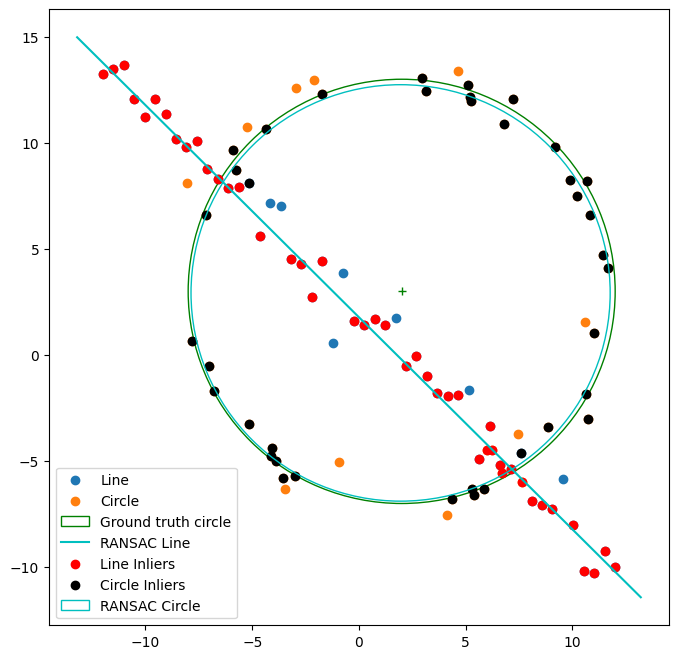

In [6]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def ransac_line_estimation(X, max_iterations=100, line_data_points_ratio=0.4, line_threshold=1.0):
    N = X.shape[0]
    line_data_points = int(line_data_points_ratio * N)
    line_best_error = np.inf
    line_sample = 2
    best_model = []
    best_line_inliers = []

    def cons(p):
        return (p[0]**2) + (p[1]**2) - 1

    constraint = ({'type':'eq', 'fun':cons})

    def total_LSE(x, indices):
        a, b, d = x[0], x[1], x[2]
        error = np.square(a*X[indices, 0] + b*X[indices, 1] - d)
        return np.sum(error)

    def consensus_set(X, x, threshold):
        a, b, d = x[0], x[1], x[2]
        error = np.abs(a*X[:, 0] + b*X[:, 1] - d)
        return (error < threshold)

    t = 0
    while t < max_iterations:
        line_indices = np.random.randint(0, N, line_sample)
        x0 = np.array([1, 1, 0])
        res = minimize(total_LSE, x0=x0, args=(line_indices), tol=1e-6, constraints=constraint)
        inliers = consensus_set(X, res.x, line_threshold)

        if np.sum(inliers) > line_data_points:
            x0 = res.x
            res = minimize(total_LSE, x0=x0, args=(inliers), tol=1e-6, constraints=constraint)

            if res.fun < line_best_error:
                line_best_error = res.fun
                best_model = res.x
                best_line_inliers = inliers

        t += 1

    return best_model, best_line_inliers


def ransac_circle_estimation(remnants, max_iterations=100, c_threshold=1.0, c_num_data=35):
    c_best_error = np.inf
    c_sample = 3
    c_best_model = []
    c_best_inliers = []

    def c_total_LSE(x, indices):
        x0, y0, r = x
        x1, y1 = remnants[indices].T
        error = (np.sqrt((x1-x0)**2 + (y1-y0)**2) - r)**2
        return np.sum(error)

    def c_consensus_set(remnants, x, threshold):
        distances = np.abs(np.linalg.norm(remnants - x[:2], axis=1) - x[2])
        return distances < threshold

    t = 0
    while t < max_iterations:
        c_indices = np.random.randint(0, len(remnants), c_sample)
        x0 = np.array([0, 0, 0])
        res = minimize(c_total_LSE, x0, args=c_indices, tol=1e-6)
        c_inliers = c_consensus_set(remnants, res.x, c_threshold)

        if np.sum(c_inliers) > c_num_data:
            x0 = res.x
            res = minimize(c_total_LSE, x0=x0, args=(c_inliers), tol=1e-6)

            if res.fun < c_best_error:
                c_best_error = res.fun
                c_best_model = res.x
                c_best_inliers = c_inliers

        t += 1

    return c_best_model, c_best_inliers


# Example usage with the initial noisy point set
N = 100
half_n = N // 2

r = 10
x0_gt, y0_gt = 2, 3
s = r / 16

t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x, y = x0_gt + (r + n) * np.cos(t), y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

s = 1.0
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
X = np.vstack((X_circ, X_line))

# Estimating line using RANSAC
best_line_model, best_line_inliers = ransac_line_estimation(X)

# Extracting the outliers to use for circle estimation
line_outliers = np.where(best_line_inliers == False)[0]
remnants = np.array([X[line_outliers[i]] for i in range(len(line_outliers))])

# Estimating circle using RANSAC
best_circle_model, best_circle_inliers = ransac_circle_estimation(remnants)

# Plotting the results
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X_line[:, 0], X_line[:, 1], label='Line')
ax.scatter(X_circ[:, 0], X_circ[:, 1], label='Circle')

circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground truth circle')
ax.add_patch(circle_gt)
ax.plot((x0_gt), (y0_gt), '+', color='g')
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = (-best_line_model[1] * x_ + best_line_model[2]) / best_line_model[1]
plt.plot(x_, y_, color='c', label='RANSAC Line')
ax.scatter(X[best_line_inliers, 0], X[best_line_inliers, 1], color='r', label='Line Inliers')
ax.scatter(remnants[best_circle_inliers, 0], remnants[best_circle_inliers, 1], color='k', label='Circle Inliers')

circle = plt.Circle((best_circle_model[0], best_circle_model[1]), best_circle_model[2], color='c', fill=False, label='RANSAC Circle')
ax.add_patch(circle)

plt.legend()
plt.show()


In [7]:
import numpy as np
from scipy.optimize import minimize

def ransac_line_estimation(X, max_iterations=100, line_data_points_ratio=0.4, line_threshold=1.0):
    N = X.shape[0]
    line_data_points = int(line_data_points_ratio * N)
    line_best_error = np.inf
    line_sample = 2
    best_model = []
    best_line_inliers = []

    def cons(p):
        return (p[0]**2) + (p[1]**2) - 1

    constraint = ({'type': 'eq', 'fun': cons})

    def total_LSE(x, indices):
        a, b, d = x[0], x[1], x[2]
        error = np.square(a * X[indices, 0] + b * X[indices, 1] - d)
        return np.sum(error)

    def consensus_set(X, x, threshold):
        a, b, d = x[0], x[1], x[2]
        error = np.abs(a * X[:, 0] + b * X[:, 1] - d)
        return (error < threshold)

    t = 0
    while t < max_iterations:
        line_indices = np.random.randint(0, N, line_sample)
        x0 = np.array([1, 1, 0])
        res = minimize(total_LSE, x0=x0, args=(line_indices), tol=1e-6, constraints=constraint)
        inliers = consensus_set(X, res.x, line_threshold)

        if np.sum(inliers) > line_data_points:
            x0 = res.x
            res = minimize(total_LSE, x0=x0, args=(inliers), tol=1e-6, constraints=constraint)

            if res.fun < line_best_error:
                line_best_error = res.fun
                best_model = res.x
                best_line_inliers = inliers

                print(f"\nIteration: {t}")
                print(f"Line best error: {res.fun}")
                print(f"Best line indices: {line_indices}")
                print(f"Best model for the line: {res.x}")
                print(f"Total number of inliers: {np.sum(inliers)}")

        t += 1

    return best_model, best_line_inliers


def ransac_circle_estimation(remnants, max_iterations=100, c_threshold=1.0, c_num_data=35):
    c_best_error = np.inf
    c_sample = 3
    c_best_model = []
    c_best_inliers = []

    def c_total_LSE(x, indices):
        x0, y0, r = x
        x1, y1 = remnants[indices].T
        error = (np.sqrt((x1 - x0)**2 + (y1 - y0)**2) - r)**2
        return np.sum(error)

    def c_consensus_set(remnants, x, threshold):
        distances = np.abs(np.linalg.norm(remnants - x[:2], axis=1) - x[2])
        return distances < threshold

    t = 0
    while t < max_iterations:
        c_indices = np.random.randint(0, len(remnants), c_sample)
        x0 = np.array([0, 0, 0])
        res = minimize(c_total_LSE, x0, args=c_indices, tol=1e-6)
        c_inliers = c_consensus_set(remnants, res.x, c_threshold)

        if np.sum(c_inliers) > c_num_data:
            x0 = res.x
            res = minimize(c_total_LSE, x0=x0, args=(c_inliers), tol=1e-6)

            if res.fun < c_best_error:
                c_best_error = res.fun
                c_best_model = res.x
                c_best_inliers = c_inliers

                print(f"\nIteration: {t}")
                print(f"Circle best error: {c_best_error}")
                print(f"Best circle indices: {c_indices}")
                print(f"Best model for circle: {c_best_model}")
                print(f"Total number of inliers: {np.sum(c_best_inliers)}")

        t += 1

    return c_best_model, c_best_inliers


# Example usage with the initial noisy point set
N = 100
half_n = N // 2

r = 10
x0_gt, y0_gt = 2, 3
s = r / 16

t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x, y = x0_gt + (r + n) * np.cos(t), y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

s = 1.0
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
X = np.vstack((X_circ, X_line))

# Estimating line using RANSAC
print('-----------------------------Implement Line Estimation--------------------------------')
best_line_model, best_line_inliers = ransac_line_estimation(X)

# Extracting the outliers to use for circle estimation
line_outliers = np.where(best_line_inliers == False)[0]
remnants = np.array([X[line_outliers[i]] for i in range(len(line_outliers))])

# Estimating circle using RANSAC
print('------------------------------------Implement Circle Estimation----------------------------------------------')
print(f"Number of inliers: {np.sum(best_line_inliers)}")
print(f"Number of remnants: {len(remnants)}")
best_circle_model, best_circle_inliers = ransac_circle_estimation(remnants)


-----------------------------Implement Line Estimation--------------------------------

Iteration: 30
Line best error: 11.159619381750641
Best line indices: [ 8 11]
Best model for the line: [0.69344837 0.72050633 1.78116083]
Total number of inliers: 42

Iteration: 55
Line best error: 9.219520255752085
Best line indices: [59 78]
Best model for the line: [0.71642467 0.69766447 1.53692565]
Total number of inliers: 43
------------------------------------Implement Circle Estimation----------------------------------------------
Number of inliers: 43
Number of remnants: 57

Iteration: 6
Circle best error: 7.183745628781049
Best circle indices: [ 3 43 18]
Best model for circle: [1.82927005 3.18180786 9.9882656 ]
Total number of inliers: 39

Iteration: 12
Circle best error: 5.492146260546208
Best circle indices: [12  8 42]
Best model for circle: [2.06415472 2.8686518  9.82137073]
Total number of inliers: 37

Iteration: 36
Circle best error: 5.459464990809127
Best circle indices: [42  9 17]
Best

-----------------------------Implement Line Estimation--------------------------------

Iteration: 16
Line best error: 8.209856534661657
Best line indices: [91 39]
Best model for the line: [0.71253569 0.70163587 1.62560432]
Total number of inliers: 43
------------------------------------Implement Circle Estimation----------------------------------------------
Number of inliers: 43
Number of remnants: 57

Iteration: 1
Circle best error: 4.442914274047629
Best circle indices: [28 46  9]
Best model for circle: [2.15346401 3.19205698 9.99221327]
Total number of inliers: 38


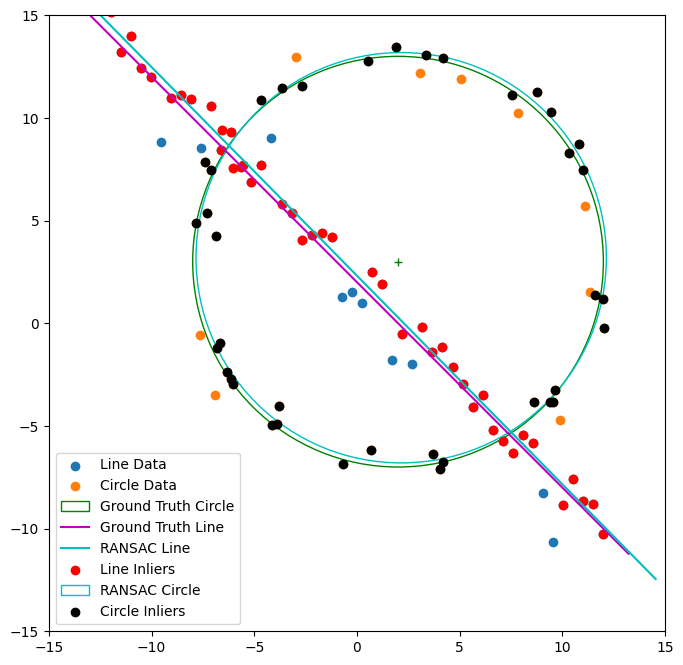

In [8]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def ransac_line_estimation(X, ax, max_iterations=100, line_data_points_ratio=0.4, line_threshold=1.0):
    N = X.shape[0]
    line_data_points = int(line_data_points_ratio * N)
    line_best_error = np.inf
    line_sample = 2
    best_model = []
    best_line_inliers = []

    def cons(p):
        return (p[0]**2) + (p[1]**2) - 1

    constraint = ({'type': 'eq', 'fun': cons})

    def total_LSE(x, indices):
        a, b, d = x[0], x[1], x[2]
        error = np.square(a * X[indices, 0] + b * X[indices, 1] - d)
        return np.sum(error)

    def consensus_set(X, x, threshold):
        a, b, d = x[0], x[1], x[2]
        error = np.abs(a * X[:, 0] + b * X[:, 1] - d)
        return (error < threshold)

    t = 0
    while t < max_iterations:
        line_indices = np.random.randint(0, N, line_sample)
        x0 = np.array([1, 1, 0])
        res = minimize(total_LSE, x0=x0, args=(line_indices), tol=1e-6, constraints=constraint)
        inliers = consensus_set(X, res.x, line_threshold)

        if np.sum(inliers) > line_data_points:
            x0 = res.x
            res = minimize(total_LSE, x0=x0, args=(inliers), tol=1e-6, constraints=constraint)

            if res.fun < line_best_error:
                line_best_error = res.fun
                best_model = res.x
                best_line_inliers = inliers

                print(f"\nIteration: {t}")
                print(f"Line best error: {res.fun}")
                print(f"Best line indices: {line_indices}")
                print(f"Best model for the line: {res.x}")
                print(f"Total number of inliers: {np.sum(inliers)}")

        t += 1

    # Plot the line
    x_min, x_max = ax.get_xlim()
    x_ = np.array([x_min, x_max])
    y_ = (-best_model[0] * x_ + best_model[2]) / best_model[1]
    ax.plot(x_, y_, color='c', label='RANSAC Line')
    ax.scatter(X[best_line_inliers, 0], X[best_line_inliers, 1], color='r', label='Line Inliers')

    return best_model, best_line_inliers


def ransac_circle_estimation(remnants, ax, max_iterations=100, c_threshold=1.0, c_num_data=35):
    c_best_error = np.inf
    c_sample = 3
    c_best_model = []
    c_best_inliers = []

    def c_total_LSE(x, indices):
        x0, y0, r = x
        x1, y1 = remnants[indices].T
        error = (np.sqrt((x1 - x0)**2 + (y1 - y0)**2) - r)**2
        return np.sum(error)

    def c_consensus_set(remnants, x, threshold):
        distances = np.abs(np.linalg.norm(remnants - x[:2], axis=1) - x[2])
        return distances < threshold

    t = 0
    while t < max_iterations:
        c_indices = np.random.randint(0, len(remnants), c_sample)
        x0 = np.array([0, 0, 0])
        res = minimize(c_total_LSE, x0, args=c_indices, tol=1e-6)
        c_inliers = c_consensus_set(remnants, res.x, c_threshold)

        if np.sum(c_inliers) > c_num_data:
            x0 = res.x
            res = minimize(c_total_LSE, x0=x0, args=(c_inliers), tol=1e-6)

            if res.fun < c_best_error:
                c_best_error = res.fun
                c_best_model = res.x
                c_best_inliers = c_inliers

                print(f"\nIteration: {t}")
                print(f"Circle best error: {c_best_error}")
                print(f"Best circle indices: {c_indices}")
                print(f"Best model for circle: {c_best_model}")
                print(f"Total number of inliers: {np.sum(c_best_inliers)}")

        t += 1

    # Plot the circle
    circle = plt.Circle((c_best_model[0], c_best_model[1]), c_best_model[2], color='c', fill=False, label='RANSAC Circle')
    ax.add_patch(circle)
    ax.scatter(remnants[c_best_inliers, 0], remnants[c_best_inliers, 1], color='k', label='Circle Inliers')

    return c_best_model, c_best_inliers


# Example usage with the initial noisy point set
N = 100
half_n = N // 2

r = 10
x0_gt, y0_gt = 2, 3
s = r / 16

t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x, y = x0_gt + (r + n) * np.cos(t), y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

s = 1.0
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
X = np.vstack((X_circ, X_line))

# Plot setup
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X_line[:, 0], X_line[:, 1], label='Line Data')
ax.scatter(X_circ[:, 0], X_circ[:, 1], label='Circle Data')

# Ground truth plot
circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground Truth Circle')
ax.add_patch(circle_gt)
ax.plot((x0_gt), (y0_gt), '+', color='g')
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = m * x_ + b
ax.plot(x_, y_, color='m', label='Ground Truth Line')
ax.legend()

# Estimating line using RANSAC
print('-----------------------------Implement Line Estimation--------------------------------')
best_line_model, best_line_inliers = ransac_line_estimation(X, ax)

# Extracting the outliers to use for circle estimation
line_outliers = np.where(best_line_inliers == False)[0]
remnants = np.array([X[line_outliers[i]] for i in range(len(line_outliers))])

# Estimating circle using RANSAC
print('------------------------------------Implement Circle Estimation----------------------------------------------')
print(f"Number of inliers: {np.sum(best_line_inliers)}")
print(f"Number of remnants: {len(remnants)}")
best_circle_model, best_circle_inliers = ransac_circle_estimation(remnants, ax)

# Final plot adjustments and display
ax.set_xlim([-15, 15])
ax.set_ylim([-15, 15])
ax.set_aspect('equal', 'box')
plt.legend()
plt.show()


-----------------------------Implement Line Estimation--------------------------------

Iteration: 1
Line best error: 13.581100507876872
Best line indices: [63 91]
Best model for the line: [0.70413822 0.71006293 1.4278575 ]
Total number of inliers: 48

Iteration: 9
Line best error: 10.350899352639686
Best line indices: [98 88]
Best model for the line: [0.6796536  0.73353322 1.42429326]
Total number of inliers: 45

Iteration: 16
Line best error: 8.847382776995213
Best line indices: [57 96]
Best model for the line: [0.68621262 0.72740102 1.26602449]
Total number of inliers: 42

Iteration: 61
Line best error: 8.2055126104967
Best line indices: [78 61]
Best model for the line: [0.67409775 0.73864215 1.46673676]
Total number of inliers: 41
------------------------------------Implement Circle Estimation----------------------------------------------
Number of inliers: 41
Number of remnants: 59

Iteration: 12
Circle best error: 8.734361070993188
Best circle indices: [19 13 23]
Best model for c

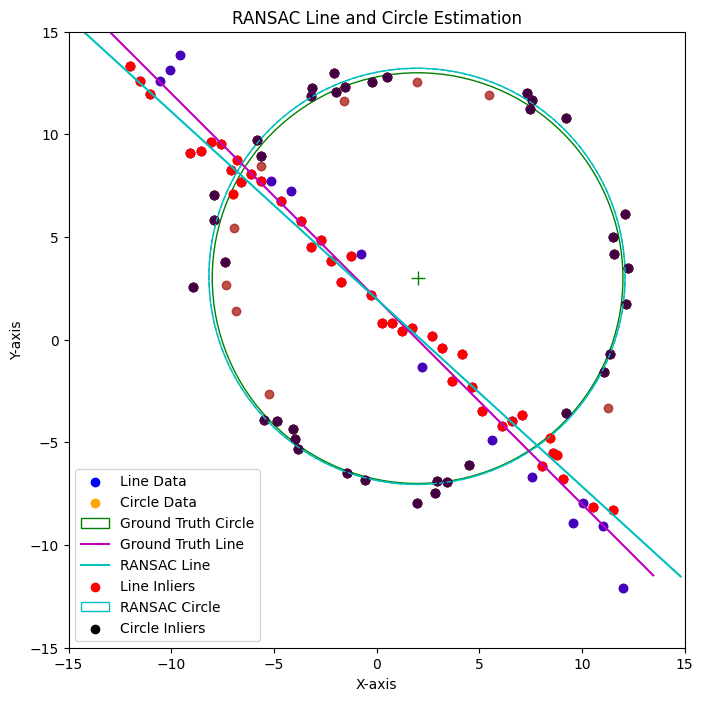

In [33]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def ransac_line_estimation(X, ax, max_iterations=100, line_data_points_ratio=0.4, line_threshold=1.0):
    N = X.shape[0]
    line_data_points = int(line_data_points_ratio * N)
    line_best_error = np.inf
    line_sample = 2
    best_model = []
    best_line_inliers = []

    def cons(p):
        return (p[0]**2) + (p[1]**2) - 1

    constraint = ({'type': 'eq', 'fun': cons})

    def total_LSE(x, indices):
        a, b, d = x[0], x[1], x[2]
        error = np.square(a * X[indices, 0] + b * X[indices, 1] - d)
        return np.sum(error)

    def consensus_set(X, x, threshold):
        a, b, d = x[0], x[1], x[2]
        error = np.abs(a * X[:, 0] + b * X[:, 1] - d)
        return (error < threshold)

    t = 0
    while t < max_iterations:
        line_indices = np.random.randint(0, N, line_sample)
        x0 = np.array([1, 1, 0])
        res = minimize(total_LSE, x0=x0, args=(line_indices), tol=1e-6, constraints=constraint)
        inliers = consensus_set(X, res.x, line_threshold)

        if np.sum(inliers) > line_data_points:
            x0 = res.x
            res = minimize(total_LSE, x0=x0, args=(inliers), tol=1e-6, constraints=constraint)

            if res.fun < line_best_error:
                line_best_error = res.fun
                best_model = res.x
                best_line_inliers = inliers

                print(f"\nIteration: {t}")
                print(f"Line best error: {res.fun}")
                print(f"Best line indices: {line_indices}")
                print(f"Best model for the line: {res.x}")
                print(f"Total number of inliers: {np.sum(inliers)}")

        t += 1

    # Plot the line
    x_min, x_max = ax.get_xlim()
    x_ = np.array([x_min, x_max])
    y_ = (-best_model[0] * x_ + best_model[2]) / best_model[1]
    ax.plot(x_, y_, color='c', label='RANSAC Line')
    ax.scatter(X[best_line_inliers, 0], X[best_line_inliers, 1], color='r', label='Line Inliers')

    return best_model, best_line_inliers

def ransac_circle_estimation(remnants, ax, max_iterations=100, c_threshold=1.0, c_num_data=35):
    c_best_error = np.inf
    c_sample = 3
    c_best_model = []
    c_best_inliers = []

    def c_total_LSE(x, indices):
        x0, y0, r = x
        x1, y1 = remnants[indices].T
        error = (np.sqrt((x1 - x0)**2 + (y1 - y0)**2) - r)**2
        return np.sum(error)

    def c_consensus_set(remnants, x, threshold):
        distances = np.abs(np.linalg.norm(remnants - x[:2], axis=1) - x[2])
        return distances < threshold

    t = 0
    while t < max_iterations:
        c_indices = np.random.randint(0, len(remnants), c_sample)
        x0 = np.array([0, 0, 0])
        res = minimize(c_total_LSE, x0, args=c_indices, tol=1e-6)
        c_inliers = c_consensus_set(remnants, res.x, c_threshold)

        if np.sum(c_inliers) > c_num_data:
            x0 = res.x
            res = minimize(c_total_LSE, x0=x0, args=(c_inliers), tol=1e-6)

            if res.fun < c_best_error:
                c_best_error = res.fun
                c_best_model = res.x
                c_best_inliers = c_inliers

                print(f"\nIteration: {t}")
                print(f"Circle best error: {c_best_error}")
                print(f"Best circle indices: {c_indices}")
                print(f"Best model for circle: {c_best_model}")
                print(f"Total number of inliers: {np.sum(c_best_inliers)}")

        t += 1

    # Plot the circle
    circle = plt.Circle((c_best_model[0], c_best_model[1]), c_best_model[2], color='c', fill=False, label='RANSAC Circle')
    ax.add_patch(circle)
    ax.scatter(remnants[c_best_inliers, 0], remnants[c_best_inliers, 1], color='k', label='Circle Inliers')

    return c_best_model, c_best_inliers

# Example usage with the initial noisy point set
N = 100
half_n = N // 2

r = 10
x0_gt, y0_gt = 2, 3
s = r / 16

t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x, y = x0_gt + (r + n) * np.cos(t), y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

s = 1.0
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
X = np.vstack((X_circ, X_line))

# Plot setup
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X_line[:, 0], X_line[:, 1], label='Line Data', color='blue')
ax.scatter(X_circ[:, 0], X_circ[:, 1], label='Circle Data', color='orange')

# Ground truth plot
circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground Truth Circle')
ax.add_patch(circle_gt)
ax.plot(x0_gt, y0_gt, '+', color='g', markersize=10)
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
x_ = np.array([x_min, x_max])
y_ = m * x_ + b
ax.plot(x_, y_, color='m', label='Ground Truth Line')

# Estimating line using RANSAC
print('-----------------------------Implement Line Estimation--------------------------------')
best_line_model, best_line_inliers = ransac_line_estimation(X, ax)

# Extracting the outliers to use for circle estimation
line_outliers = np.where(best_line_inliers == False)[0]
remnants = X[line_outliers]

# Estimating circle using RANSAC
print('------------------------------------Implement Circle Estimation----------------------------------------------')
print(f"Number of inliers: {np.sum(best_line_inliers)}")
print(f"Number of remnants: {len(remnants)}")
best_circle_model, best_circle_inliers = ransac_circle_estimation(remnants, ax)

# Final plot adjustments and display
ax.set_xlim([-15, 15])
ax.set_ylim([-15, 15])
ax.set_aspect('equal', 'box')
ax.legend()
plt.title("RANSAC Line and Circle Estimation")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Display additional elements
ax.scatter(X[best_line_inliers, 0], X[best_line_inliers, 1], color='r', label='Line Inliers')
ax.scatter(remnants[best_circle_inliers, 0], remnants[best_circle_inliers, 1], color='k', label='Circle Inliers')
ax.scatter(remnants[:, 0], remnants[:, 1], color='purple', label='Circle Sample Points', alpha=0.5)

# Show RANSAC Circle
circle_ransac = plt.Circle((best_circle_model[0], best_circle_model[1]), best_circle_model[2], color='c', fill=False, linestyle='--', label='RANSAC Circle')
ax.add_patch(circle_ransac)

plt.show()


# Question 3

Original Image shape: (768, 1024, 3)
Overlay Image shape: (960, 1920, 3)
Selected Points: [(227, 157), (211, 445), (465, 302), (458, 485)]
Transformation Matrix: 
[[-1.05370008e-02  5.27959775e-01  2.27000000e+02]
 [ 1.45352455e-01  3.32919126e-01  1.57000000e+02]
 [-1.04439216e-05  6.02243244e-04  1.00000000e+00]]


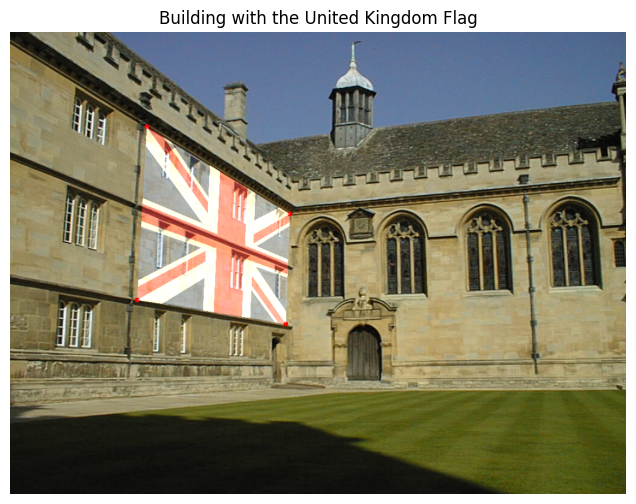

In [40]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def mouse_click_handler(event, x, y, flags, param):
    # Handle mouse clicks to collect points for image warping
    global selected_points

    if event == cv.EVENT_LBUTTONDOWN:
        selected_points.append((x, y))
        cv.circle(original_image, (x, y), 4, (0, 0, 255), -1)
        
        # Update the displayed image with selected points
        cv.imshow('Original Image', original_image)

# Load the base and overlay images
original_image = cv.imread('Images/New folder/005.jpg')
overlay_image = cv.imread('Images/New folder/flag.png')

# Show the original image for point selection
cv.imshow('Original Image', original_image)
cv.setMouseCallback('Original Image', mouse_click_handler)

# Initialize a list to store selected points
selected_points = []

# Collect four points in the order: top-left, bottom-left, top-right, bottom-right
while len(selected_points) < 4:
    cv.waitKey(1)  # Keep waiting for user input
cv.destroyAllWindows()

# Set source and destination points for homography transformation
dest_points = np.array(selected_points).astype(np.float32)
height, width = overlay_image.shape[:2]
src_points = np.float32([[0, 0], [width, 0], [0, height], [width, height]])

# Compute the homographic transformation matrix
transformation_matrix = cv.getPerspectiveTransform(src_points, dest_points)

# Apply the perspective transformation to the overlay image
transformed_image = cv.warpPerspective(overlay_image, transformation_matrix, (original_image.shape[1], original_image.shape[0]))

# Blend the two images together with a specified opacity
blend_opacity = 0.5  # Adjust this value for different blending effects
final_image = cv.addWeighted(original_image, 1, transformed_image, blend_opacity, 0)


print("Original Image shape:", original_image.shape)
print("Overlay Image shape:", overlay_image.shape)
print("Selected Points:", selected_points)
print('Transformation Matrix: ')
print(transformation_matrix)


# Display the final blended image
plt.figure(figsize=(12, 6))
plt.imshow(cv.cvtColor(final_image, cv.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.title('Building with the United Kingdom Flag')
plt.axis('off')  # Hide axis for a cleaner look
plt.show()


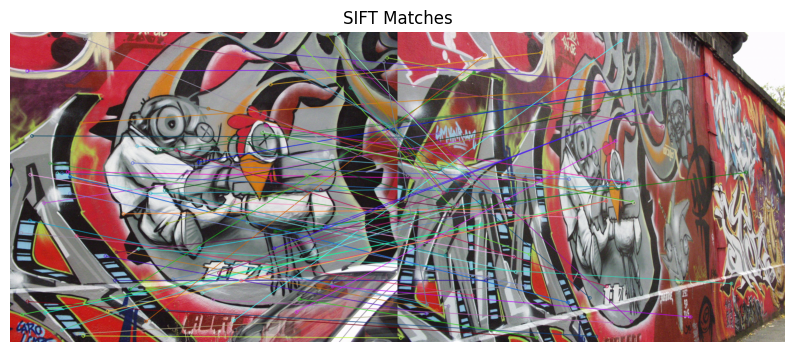

In [41]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the images
img1 = cv.imread('Images/graffities/img1.ppm')
img5 = cv.imread('Images/graffities/img5.ppm')

# Convert images to grayscale and RGB
img1_gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img5_gray = cv.cvtColor(img5, cv.COLOR_BGR2GRAY)
img1_rgb = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img5_rgb = cv.cvtColor(img5, cv.COLOR_BGR2RGB)

# Initialize the SIFT feature detector
sift_detector = cv.SIFT_create()

# Detect keypoints and compute descriptors for both grayscale images
keypoints_image1, descriptors_image1 = sift_detector.detectAndCompute(img1_gray, None)
keypoints_image5, descriptors_image5 = sift_detector.detectAndCompute(img5_gray, None)

# Create a Brute-Force Matcher with L2 norm (default parameters)
matcher = cv.BFMatcher(cv.NORM_L2, crossCheck=False)

# Match descriptors using KNN with k=2
raw_matches = matcher.knnMatch(descriptors_image1, descriptors_image5, k=2)

# Apply the ratio test to filter good matches
filtered_matches = [m for m, n in raw_matches if m.distance < 0.75 * n.distance]

# Draw the good matches between the two images
matched_image = cv.drawMatches(img1_rgb, keypoints_image1, img5_rgb, keypoints_image5, filtered_matches, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matched result
plt.figure(figsize=(10, 6))
plt.imshow(matched_image)
plt.title('SIFT Matches')
plt.axis('off')  # Hide axes for better visualization
plt.show()



((< cv2.DMatch 000001A98F69F770>, < cv2.DMatch 000001A98F69D350>), (< cv2.DMatch 000001A98F7EAA70>, < cv2.DMatch 000001A98F7E9B50>), (< cv2.DMatch 000001A98F7EB670>, < cv2.DMatch 000001A98F7EB3D0>), (< cv2.DMatch 000001A98F7EB2F0>, < cv2.DMatch 000001A98F7EAA90>), (< cv2.DMatch 000001A98F7EB970>, < cv2.DMatch 000001A98F7E9B70>))


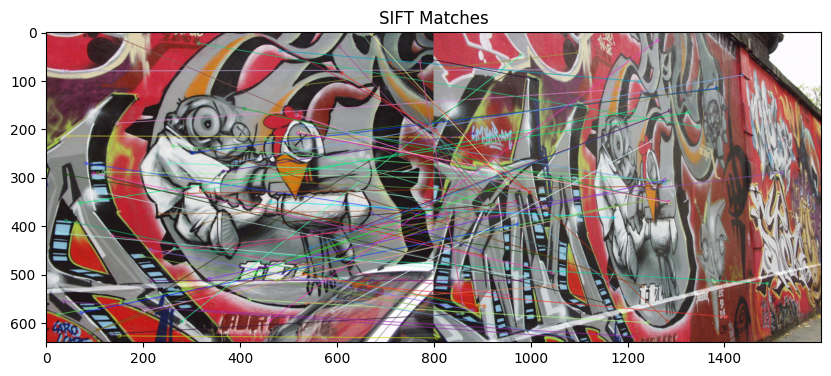

In [11]:
img1_gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img5_gray = cv.cvtColor(img5, cv.COLOR_BGR2GRAY)
img1_rgb = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img5_rgb = cv.cvtColor(img5, cv.COLOR_BGR2RGB)

# Initialize the SIFT detector
sift = cv.SIFT_create()

# Create the Brute-Force Matcher
bf = cv.BFMatcher()

# Find SIFT keypoints and descriptors for images
keypoints1, descriptors1 = sift.detectAndCompute(img1_gray, None)
keypoints5, descriptors5 = sift.detectAndCompute(img5_gray, None)

# Match descriptors
matches = bf.knnMatch(descriptors1, descriptors5, k=2)
print(matches[:5])

# Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < (0.75*n.distance):
        good_matches.append(m)

# Draw the matches
matched_img = cv.drawMatches(img1_rgb, keypoints1, img5_rgb, keypoints5, good_matches, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display or save the matched image
plt.figure(figsize=(10,6))
plt.imshow(matched_img)
plt.title('SIFT Matches')
plt.show()


C:\Users\Jaliya Nimantha\AppData\Local\Temp\ipykernel_16624\2448811536.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  estimated_p2 = (1 / estimated_p2[2]) * estimated_p2
C:\Users\Jaliya Nimantha\AppData\Local\Temp\ipykernel_16624\2448811536.py:11: RuntimeWarning: invalid value encountered in multiply
  estimated_p2 = (1 / estimated_p2[2]) * estimated_p2


Computed Homography Matrix:
[[-5.93718849e-01 -4.68608955e-01  3.52640696e+02]
 [-9.30217644e-01 -6.87814902e-01  5.39595438e+02]
 [-1.70335180e-03 -1.28757073e-03  1.00000000e+00]]


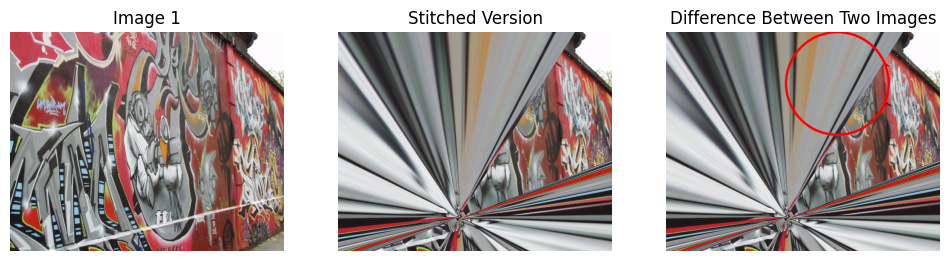

In [12]:
# Compute the Homography Matrix using RANSAC
from scipy import linalg

def calDistance(point_1, point_2, homography):
    # Compute the Euclidean distance between two points
    
    p1 = np.array([point_1[0], point_1[1], 1])
    p2 = np.array([point_2[0], point_2[1], 1])
    
    estimated_p2 = np.dot(homography, p1.T)
    estimated_p2 = (1 / estimated_p2[2]) * estimated_p2
    
    return np.linalg.norm(p2.T - estimated_p2)

def RANSAC(point_1, point_2, threshold=40, iterations=100, min_inlier_count=10):
    num_inliers = 0
    selected_inliers = None
    best_homography = None
   
    points = np.hstack((point_1, point_2))
    
    for _ in range(iterations):
        np.random.shuffle(points)
        p1, p1_rem, p2, p2_rem = points[:4, :2], points[4:, :2], points[:4, 2:], points[4:, 2:]
        
        homography = cv.findHomography(p1, p2)[0]
        
        # Initialize an empty list to store inliers
        inliers = []
        
        # Iterate through corresponding points and calculate distances
        for i in range(len(p1_rem)):
            if calDistance(p1_rem[i], p2_rem[i], homography) < threshold:
               inliers.append((p1_rem[i], p2_rem[i]))
                
        if len(inliers)>num_inliers and len(inliers)>=min_inlier_count:
            num_inliers = len(inliers)
            selected_inliers = np.array(inliers)
            best_homography = homography
            
    return best_homography

# Create a SIFT detector
sift = cv.SIFT_create(nOctaveLayers=3, contrastThreshold=0.08, edgeThreshold=12, sigma=0.9)

# Detect keypoints and compute descriptors
keypoints1, descriptors1 = sift.detectAndCompute(img5, None)
keypoints2, descriptors2 = sift.detectAndCompute(img1, None)

# Create a Brute-Force Matcher
bf_matcher = cv.BFMatcher()
# Perform keypoint matching
matches = bf_matcher.knnMatch(descriptors1, descriptors2, k=2)
#region
good_matches = []
keypoints1_matched = []
keypoints2_matched = []
#endregion
# Apply ratio test to select good matches and corresponding keypoints
for match1, match2 in matches:
    if match1.distance < 0.75 * match2.distance:
        good_matches.append(match1)
        keypoints1_matched.append(keypoints1[match1.queryIdx].pt)
        keypoints2_matched.append(keypoints2[match1.trainIdx].pt)
# Convert lists to NumPy arrays for further processing
good_matches = np.array(good_matches)
keypoints1_matched = np.array(keypoints1_matched)
keypoints2_matched = np.array(keypoints2_matched)

# calculate homography using RANSAC
computed_homography = RANSAC(keypoints2_matched, keypoints1_matched)
#region
print("Computed Homography Matrix:")
print(computed_homography)
H = np.array(computed_homography)
#endregion
# warp first image using the perspective transformation matrix H
img_warped = cv.warpPerspective(img1, H, (img5.shape[1], img5.shape[0]))
ret, threshold = cv.threshold(img_warped, 10, 1, cv.THRESH_BINARY_INV)
img5_threshold = np.multiply(threshold, img5)
# Blend the above image with warped image
img_blended = cv.addWeighted(img5_threshold, 1, img_warped, 1, 0)

#region
plt.figure(figsize=(12,6))

plt.subplot(131)
plt.imshow(cv.cvtColor(img5, cv.COLOR_BGR2RGB))
plt.title("Image 1")
plt.axis("off")

plt.subplot(132)
plt.imshow(cv.cvtColor(img_blended, cv.COLOR_BGR2RGB))
plt.title("Stitched Version")
plt.axis("off")

# Highlight the difference between the images
img_blended = cv.circle(img_blended, (500, 150), 150, (0, 0, 255), 5)

plt.subplot(133)
plt.imshow(cv.cvtColor(img_blended, cv.COLOR_BGR2RGB))
plt.title("Difference Between Two Images")
plt.axis("off")

plt.show()
#endregion

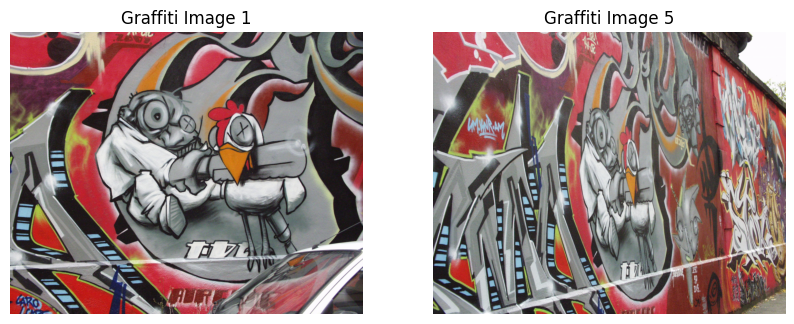

In [43]:
img1, img2 = cv.imread("Images/graffities/img1.ppm"), cv.imread("Images/graffities/img5.ppm")
img1, img2 = cv.cvtColor(img1, cv.COLOR_BGR2RGB), cv.cvtColor(img2, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(img1)
ax[0].axis('off')
ax[0].set_title('Graffiti Image 1')
ax[1].imshow(img2)
ax[1].axis('off')
ax[1].set_title('Graffiti Image 5')
plt.show()

In [42]:
sift = cv.xfeatures2d.SIFT_create()

kp1, desc1 = sift.detectAndCompute(img1, None)
kp2, desc2 = sift.detectAndCompute(img2, None)

bf = cv.BFMatcher()
matches = bf.knnMatch(desc1, desc2, k=2)
good, pts1, pts2 = [], [], []

for m, n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
        pts1.append(kp1[m.queryIdx].pt)
        pts2.append(kp2[m.trainIdx].pt)

good, pts1, pts2 = np.array(good), np.array(pts1), np.array(pts2)
matched_img = cv.drawMatchesKnn(img1, kp1, img2, kp2, good[:50], None, flags=2)

fig, ax = plt.subplots(figsize = (10, 10))
#ax.set_title('SIFT Feature Matching Between Graffiti Images')
ax.imshow(matched_img)
ax.axis('off')
plt.show()

AttributeError: module 'cv2' has no attribute 'xfeatures2d'

In [43]:
import cv2
print(cv2.__version__)


4.10.0


NameError: name 'image1' is not defined

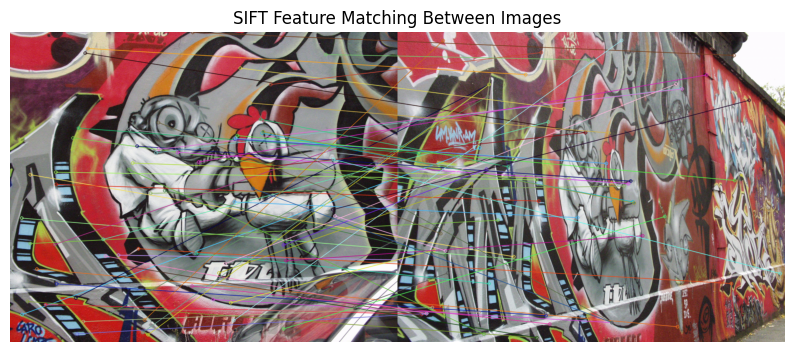

In [14]:


# Check if images were loaded properly
if img1 is None or img2 is None:
    print("Error: One or both images could not be loaded.")
    exit()

# Initialize SIFT detector
try:
    sift = cv.SIFT_create()
except AttributeError as e:
    print("Error initializing SIFT:", e)
    exit()

# Detect keypoints and compute descriptors
kp1, desc1 = sift.detectAndCompute(img1, None)
kp2, desc2 = sift.detectAndCompute(img2, None)

# Use BFMatcher for matching descriptors
bf = cv.BFMatcher()
matches = bf.knnMatch(desc1, desc2, k=2)

# Apply ratio test to find good matches
good = []
pts1 = []
pts2 = []

for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append(m)
        pts1.append(kp1[m.queryIdx].pt)
        pts2.append(kp2[m.trainIdx].pt)

# Convert points to numpy arrays for further processing
pts1 = np.array(pts1)
pts2 = np.array(pts2)

# Draw matches on the images
matched_img = cv.drawMatchesKnn(img1, kp1, img2, kp2, [good], None, flags=2)

# Plotting the matched features
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('SIFT Feature Matching Between Images')
ax.imshow(matched_img)
ax.axis('off')
plt.show()


In [15]:
def homography(pts1, pts2):
    mean1, mean2 = np.mean(pts1, axis=0), np.mean(pts2, axis=0)
    s1, s2 = len(pts1)*np.sqrt(2)/np.sum(np.sqrt(np.sum((pts1-mean1)**2, axis=1))), len(pts1)*np.sqrt(2)/np.sum(np.sqrt(np.sum((pts2-mean2)**2, axis=1)))
    tx1, ty1, tx2, ty2 = -s1*mean1[0], -s1*mean1[1], -s2*mean2[0], -s2*mean2[1]
    T1, T2 = np.array(((s1, 0, tx1), (0, s1, ty1), (0, 0, 1))), np.array(((s2, 0, tx2), (0, s2, ty2), (0, 0, 1)))
    A = []

    for i in range(len(pts1)):
        X11, X21 = T1 @ np.concatenate((pts1[i], [1])).reshape(3, 1), T2 @ np.concatenate((pts2[i], [1])).reshape(3, 1)
        A.append((-X11[0][0], -X11[1][0], -1, 0, 0, 0, X21[0][0]*X11[0][0], X21[0][0]*X11[1][0], X21[0][0]))
        A.append((0, 0, 0, -X11[0][0], -X11[1][0], -1, X21[1][0]*X11[0][0], X21[1][0]*X11[1][0], X21[1][0]))
    
    A = np.array(A)
    U, S, V = np.linalg.svd(A, full_matrices=True)
    h = np.reshape(V[-1], (3, 3))
    H = linalg.inv(T2) @ h @ T1
    H = (1 / H.item(8)) * H
    return H
        

In [16]:
def dist(P1, P2, H):
    p1 = np.array([P1[0], P1[1], 1])
    p2 = np.array([P2[0], P2[1], 1])

    p2_estimate = np.dot(H, p1.T)
    p2_estimate = (1 / p2_estimate[2]) * p2_estimate
    return np.linalg.norm(p2.T - p2_estimate)

In [17]:
def RANSAC_homography(points1, points2):
    inlier_count, selected_inliers = 0, None
    points = np.hstack((points1, points2))
    num_iterations = int(np.log(1 - 0.95)/np.log(1 - (1 - 0.5)**4))
    
    for _ in range(num_iterations):
        np.random.shuffle(points)
        pts1, pts1_rem, pts2, pts2_rem = points[:4, :2],  points[4:, :2], points[:4, 2:], points[4:, 2:]
        H = homography(pts1, pts2)
        inliers = [(pts1_rem[i], pts2_rem[i]) for i in range(len(pts1_rem)) if dist(pts1_rem[i], pts2_rem[i], H) < 100]
        if len(inliers) > inlier_count:
            inlier_count = len(inliers)
            selected_inliers = np.array(inliers)
    
    H = homography(selected_inliers[:, 0], selected_inliers[:, 1])
    return H

In [18]:
H = RANSAC_homography(pts1, pts2)
print(H)

[[ 5.48604084e-01  3.21509477e-01 -2.10960592e+02]
 [-7.25833839e-01  2.35308966e-01  4.91552566e+02]
 [-8.88021856e-04  2.91205871e-05  1.00000000e+00]]


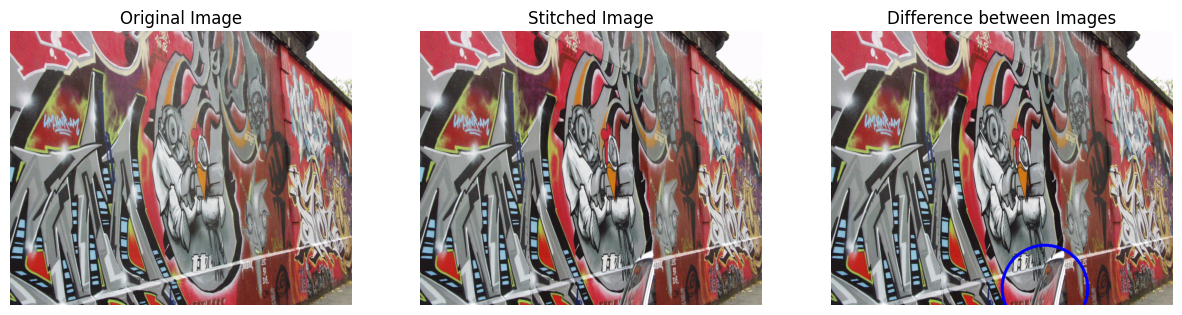

In [23]:
file = open(r"Images/graffities/H1to5p", "r")
H = []

for _ in range(3):
    H.append(tuple(map(float, file.readline().strip().split())))

H = np.array(H)
img_p = cv.warpPerspective(img1, H, (img2.shape[1], img2.shape[0]))
ret, threshold = cv.threshold(img_p, 10, 1, cv.THRESH_BINARY_INV)
img2_thresholded = np.multiply(threshold, img2)
img_blended = cv.addWeighted(img2_thresholded, 1, img_p, 1, 0)

fig, ax = plt.subplots(1, 3, figsize=(15, 12))
ax[0].imshow(img2)
ax[0].set_title("Original Image")
ax[0].axis("off")
ax[1].imshow(img_blended)
ax[1].set_title("Stitched Image")
ax[1].axis("off")

img_blended = cv.circle(img_blended, (500, 600), 100, (0, 0, 255), 5)

ax[2].imshow(img_blended)
ax[2].set_title("Difference between Images")
ax[2].axis("off")
plt.show()